In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importo el archivo Hechos_Homicidios

In [77]:
df_hecho = pd.read_excel('Hechos_Homicidios.xlsx')

In [78]:
df_hecho

,Id,N_Victimas,Fecha,Año,Mes,Dia,Hora,Lugar_Del_Hecho,Tipo_De_Calle,Comuna,Longitud,Latitud,Victima,Acusado,Rango_Horario
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.475340,-34.687570,Moto,Auto,0:00 - 6:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,Av Gral Paz Y Av De Los Corrales,Autopista,9,-58.508775,-34.669777,Auto,Pasajeros,0:00 - 6:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,Av Entre Rios 2034,Avenida,1,-58.390403,-34.631894,Moto,Auto,6:00 - 12:00
3,2016-0005,1,2016-01-21,2016,1,21,05:20:00,Av San Juan Y Presidente Luis Saenz Peña,Avenida,1,-58.387183,-34.622466,Moto,Pasajeros,0:00 - 6:00
4,2016-0008,1,2016-01-24,2016,1,24,18:30:00,Av 27 De Febrero Y Av Escalada,Avenida,8,-58.444513,-34.684759,Moto,Objeto Fijo,12:00 - 19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2021-0093,1,2021-12-13,2021,12,13,17:10:00,Av. Riestra Y Mom,Avenida,7,-58.433538,-34.645616,Moto,Auto,12:00 - 19:00
569,2021-0094,1,2021-12-20,2021,12,20,01:10:00,Au Dellepiane Y Lacarra,Autopista,9,-58.467398,-34.651178,Moto,Auto,0:00 - 6:00
570,2021-0095,1,2021-12-30,2021,12,30,00:43:00,Av. Gaona Y Terrada,Avenida,11,-58.472934,-34.619847,Moto,Cargas,0:00 - 6:00
571,2021-0096,1,2021-12-15,2021,12,15,10:30:00,Av. Eva Peron 4071,Avenida,9,-58.470668,-34.650217,Auto,Cargas,6:00 - 12:00


### Creo una columna Semestre

In [79]:
df_hecho['Semestre'] = df_hecho['Mes'].apply(lambda mes: 1 if mes <= 6 else 2)

### Mantengo solamente las lineas donde ['Victima'] == 'Moto'

In [80]:
df_hecho = df_hecho[df_hecho['Victima'] == 'Moto']

### Agrupo usando las columnas 'Año', 'Semestre' y 'Comuna'. Hago un conteo de Victimas

In [81]:
df_group = df_hecho.groupby(['Año', 'Semestre', 'Comuna'])['Victima'].count().reset_index()

In [82]:
df_group

,Año,Semestre,Comuna,Victima
0,2016,1,1,3
1,2016,1,3,2
2,2016,1,4,3
3,2016,1,7,2
4,2016,1,8,3
...,...,...,...,...
130,2021,2,9,1
131,2021,2,10,1
132,2021,2,11,3
133,2021,2,12,2


### Organizo los valores usando las Columnas Año y Comuna

In [83]:
df_group_sorted = df_group.sort_values(['Comuna', 'Año'], ascending=True)

In [84]:
df_group_sorted

,Año,Semestre,Comuna,Victima
0,2016,1,1,3
8,2016,2,1,4
20,2017,1,1,3
33,2017,2,1,1
46,2018,1,1,3
...,...,...,...,...
68,2018,2,15,2
81,2019,1,15,2
92,2019,2,15,1
110,2020,2,15,3


### Creo una columna Reducción y la calculo la variación percentual semestralmente

In [85]:
df_group_sorted['Reduccion'] = (df_group_sorted.groupby('Comuna')['Victima'].shift(1) - df_group_sorted['Victima']) / df_group_sorted.groupby('Comuna')['Victima'].shift(1) * 100

In [86]:
df_group_sorted.fillna(0, inplace= True)

### Hago un agrupamiento por Año y calculo la media de la variación percentual calculada

In [87]:
reducion_anual = df_group_sorted.groupby('Año')['Reduccion'].mean().reset_index()

In [88]:
reducion_anual

,Año,Reduccion
0,2016,8.333333
1,2017,-20.192308
2,2018,-42.318841
3,2019,-9.375000
4,2020,-14.814815
5,2021,-25.486111


### Grafico la media anual de la variación percentual

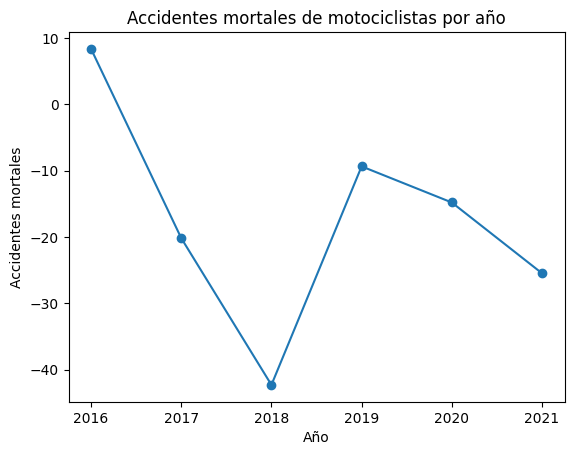

In [89]:
plt.plot(reducion_anual['Año'], reducion_anual['Reduccion'], marker='o')
plt.xlabel('Año')
plt.ylabel('Accidentes mortales')
plt.title('Accidentes mortales de motociclistas por año')

plt.show()

In [90]:
df_group_sorted

,Año,Semestre,Comuna,Victima,Reduccion
0,2016,1,1,3,0.000000
8,2016,2,1,4,-33.333333
20,2017,1,1,3,25.000000
33,2017,2,1,1,66.666667
46,2018,1,1,3,-200.000000
...,...,...,...,...,...
68,2018,2,15,2,33.333333
81,2019,1,15,2,0.000000
92,2019,2,15,1,50.000000
110,2020,2,15,3,-200.000000


### Usando sklearn calculo la regresión linear para determinar el valor de tendencia

In [91]:
import numpy as np
from sklearn.linear_model import LinearRegression


x = df_group_sorted['Semestre'].values.reshape(-1, 1)
y = df_group_sorted['Victima'].values


regression_model = LinearRegression()


regression_model.fit(x, y)


tendencia = regression_model.coef_[0]


print(f"Tendencia: {tendencia:.2f}")

Tendencia: -0.22


In [92]:
df_group_sorted['Tendencia'] = tendencia

In [93]:
df_group_sorted

,Año,Semestre,Comuna,Victima,Reduccion,Tendencia
0,2016,1,1,3,0.000000,-0.218832
8,2016,2,1,4,-33.333333,-0.218832
20,2017,1,1,3,25.000000,-0.218832
33,2017,2,1,1,66.666667,-0.218832
46,2018,1,1,3,-200.000000,-0.218832
...,...,...,...,...,...,...
68,2018,2,15,2,33.333333,-0.218832
81,2019,1,15,2,0.000000,-0.218832
92,2019,2,15,1,50.000000,-0.218832
110,2020,2,15,3,-200.000000,-0.218832


### Guardo df en archivo XLSX

In [95]:
df_group_sorted.to_excel('sinestros_moto.xlsx', index= False)